# ***Fashion MNIST Classification Project:***

>



# Import Libraries

In [2]:
import keras # Keras is a high-level neural networks API that runs on top of other lower-level deep learning frameworks such as TensorFlow.
import numpy as np # numPy is a powerful numerical computing library that provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays
import pandas as pd # Pandas is a popular open-source data manipulation and analysis library for Python. It provides data structures for efficiently handling large datasets and tools for cleaning, exploring, and analyzing data=
import matplotlib.pyplot as plt # matplotlib is for 2d visualizations/ graphs
import seaborn as sns # Seaborn is a statistical data visualization library in Python that is based on Matplotlib

# Load Data


In [3]:
# keras library se humne aik data set load kraya hai (data set name: fashion_mnist)
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# data k shape dkh rhe hain
# 60000 humare ps images ki information hai, 28 rows hain and 28 columns hain. Mtlb hr aik image k size 28 * 28 hai
X_train.shape, y_train.shape


((60000, 28, 28), (60000,))

In [5]:
# yhn pr 10000 humare ps images ki information hai, 28 rows hain and 28 columns hain. Humare data set mai total images 70,000 hain
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [6]:
# first img ko access kr rhe hain as a numeric data. Img matrix k format mai rehti hain(means rows and columns mai)
# 0 in output means white pixel, 255 means black pixel
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
# for label
# 9 in output means Ankle boot that is store in list as 9 index
y_train[0]

9

In [8]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot '''

'\n0 => T-shirt/top\n1 => Trouser\n2 => Pullover\n3 => Dress\n4 => Coat\n5 => Sandal\n6 => Shirt\n7 => Sneaker\n8 => Bag\n9 => Ankle boot '

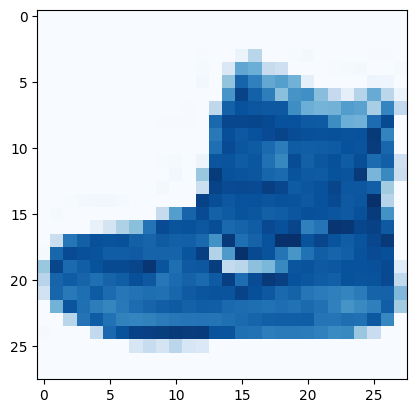

In [9]:
# for showing first img
# plt.imshow convert the data into visualization
# cmap(color map) is a set of colors that can be used to represent data values in a graphical way
# Img is liye clear nhi hai kio k resolution 28 * 28 hai
plt.imshow(X_train[0], cmap= "Blues")

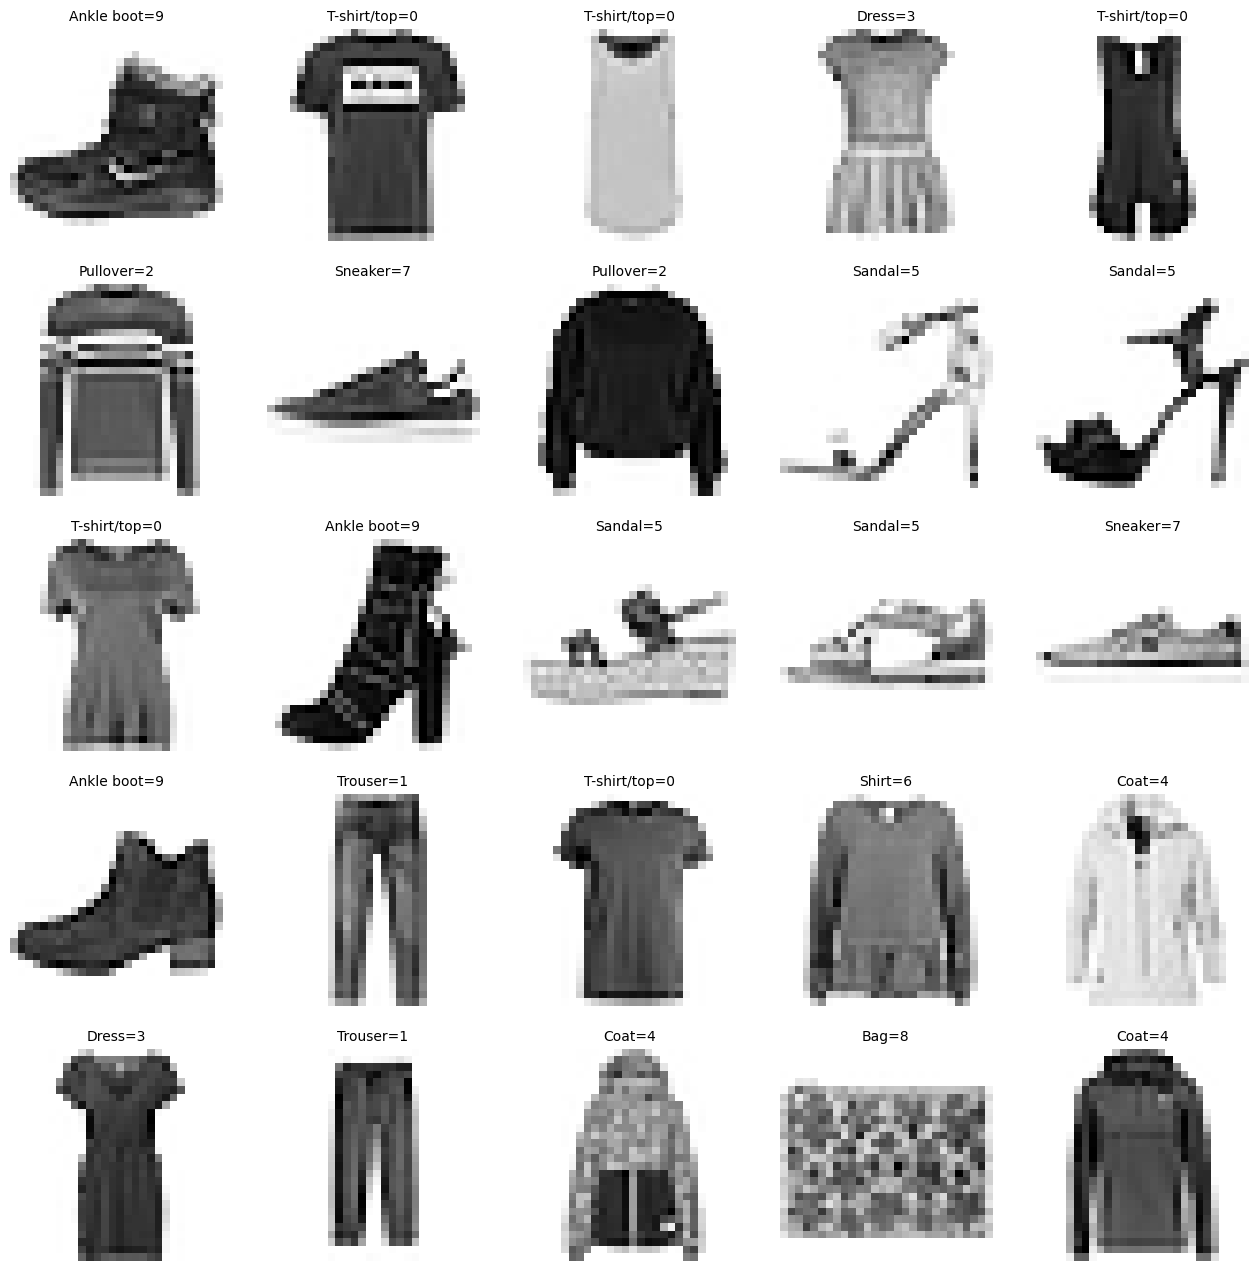

In [10]:
# Jitni bhi images hain aus mai se 25 imgs show hungi
plt.figure(figsize=(16,16)) # jo bhi figure hai aus k size define kra hai
for i in range(25): # for 25 imgs
  plt.subplot(5,5,i+1) # 5 rows and 5 columns. plt.subplot is a Matplotlib function used to create subplots within a single figure.
  plt.imshow(X_train[i],cmap="Greys") # Main function
  plt.axis('off')   # plt.axis is a Matplotlib function that is used to set or retrieve the current axis properties
  plt.title(class_labels[y_train[i]]+"="+str(y_train[i]), fontsize=10)

  '''
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot '''

# Featuring Scalling

In [11]:
# Humare dataset mai 0 - 255 values hain. Value ko normalize krne k liye hum 0 - 1 convert krenge. Normalize helps to inprove the performance
X_train = X_train/255
X_test = X_test/255

In [12]:
X_train[0]  # data scale ho chuka hai

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Building Neural Network

In [13]:
# In Keras, Sequential is a class that provides a linear stack of layers, allowing you to create a neural network model layer by layer.
# 28*28 pixel k dataset ko single vector mai convert krne k liye, hum use krte hain Flatten
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]), # 28 * 28 dataSet convert into 784(Means first img k liye 784 inputs honge)
    # first layer (input layer) create krne k liye, hum dense use krte hain. First input layer mai humne 32 nuerons/units diye. Jitne ziyada neurons honge utne complex hoga model ko train krna
    keras.layers.Dense(units=32, activation= 'relu'), # jb humara neuron network output dega or agr value postive hui to 1 and agr neg ya 0 hui to 0
    # Creating Output layer, 10 neurons because of 10 classes. Softmax function output layer mai multiple classes k liye use hota hai
    keras.layers.Dense(units=10, activation = 'softmax')
    ])

In [14]:
# Model summary
model.summary()
# flattens it into a one-dimensional array with 784 elements. The "None" indicates that the batch size can be variable.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# model compile
# This specifies the optimization algorithm to be used during training. In this case, it's set to 'adam'. Adam (short for Adaptive Moment Estimation) is a popular optimization algorithm that combines ideas from RMSprop and Momentum.
# Sparse_categorical_crossentropy' is often used in classification problems where the target variable is integers (e.g., class labels). It is suitable for scenarios where each input belongs to exactly one class.
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [16]:
# Train Model
# epochs = 1, mtlb dataSet ko aik dfa train kro, epochs agr brhaein ge to accuracy mazeed achi ho jae gi
# agr first epoch mai koi mistake ki hogi agent ne to aus se learn kr k second epoch mai mistake nhi kre ga, or is se accuracy achi ho jae gi
model.fit(X_train, y_train, epochs=1)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.5494 - accuracy: 0.8113


In [17]:
# yhn pr epochs = 10 hain means accuracy brh jae gi and loss kam ho jae ga
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4119 - accuracy: 0.8540
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3795 - accuracy: 0.8660
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3588 - accuracy: 0.8714
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3424 - accuracy: 0.8768
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3295 - accuracy: 0.8800
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3215 - accuracy: 0.8836
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3114 - accuracy: 0.8874
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3061 - accuracy: 0.8889
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2974 - accuracy: 0.8906
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.291

# Test and Evaluate Neural Network Model

In [18]:
# Test Model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3855 - accuracy: 0.8620


[0.3854527473449707, 0.8619999885559082]

In [19]:
# data ko dkh kr label predict krna hai
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [20]:
y_pred[0].round(2) # round function . k bd jitne apko number chahiye utne le ata hai
# 0.96 means 96% probability hai

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
      dtype=float32)

In [21]:
# argmax --> jis index pr max value hoti hai wo dedeta hai. Upr 0.96, 9 index pr tha
np.argmax(y_pred[0].round(2))

9

In [22]:
'''
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot '''

'\n0 => T-shirt/top\n1 => Trouser\n2 => Pullover\n3 => Dress\n4 => Coat\n5 => Sandal\n6 => Shirt\n7 => Sneaker\n8 => Bag\n9 => Ankle boot '

In [23]:
# For Actual Value
y_test[0]

9

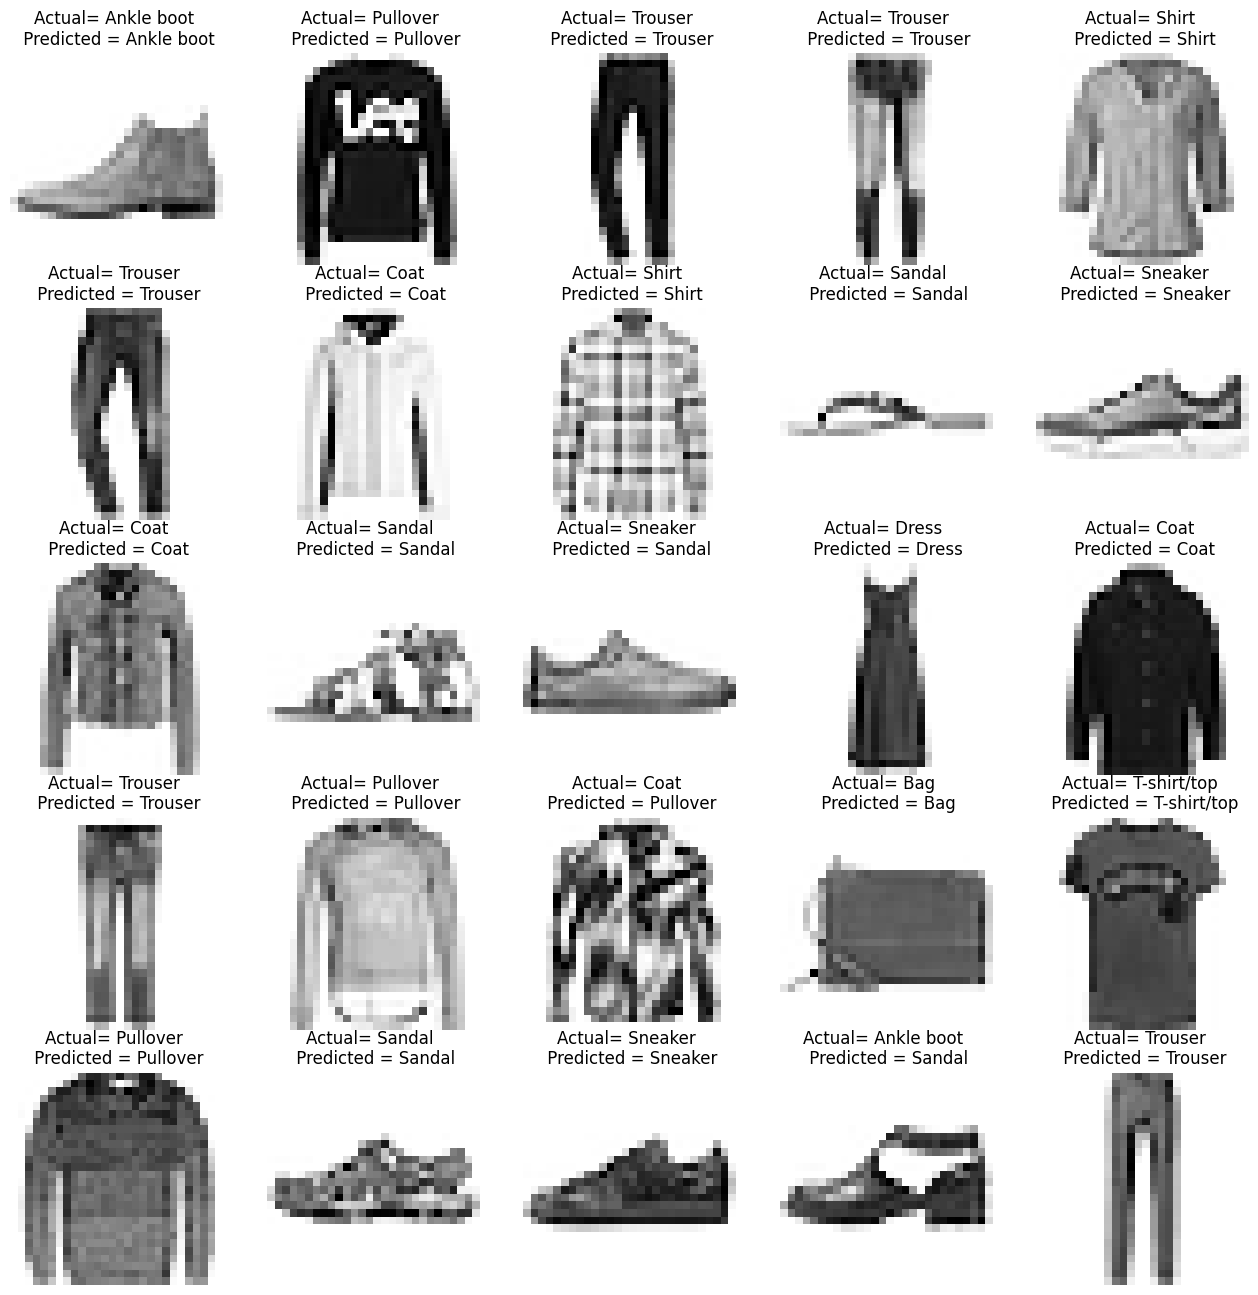

In [24]:
# Actual and Predict imgs ko show kr rhy hain
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[i],cmap="Greys")
  plt.axis('off')
  plt.title("Actual= {} \n Predicted = {}".format(class_labels[y_test[i]], class_labels[np.argmax(y_pred[i])]))

# Confusion Matrix

In [25]:
# Confusion matrix is for evalution
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, [ np.argmax(i) for i in y_pred])

<Axes: >

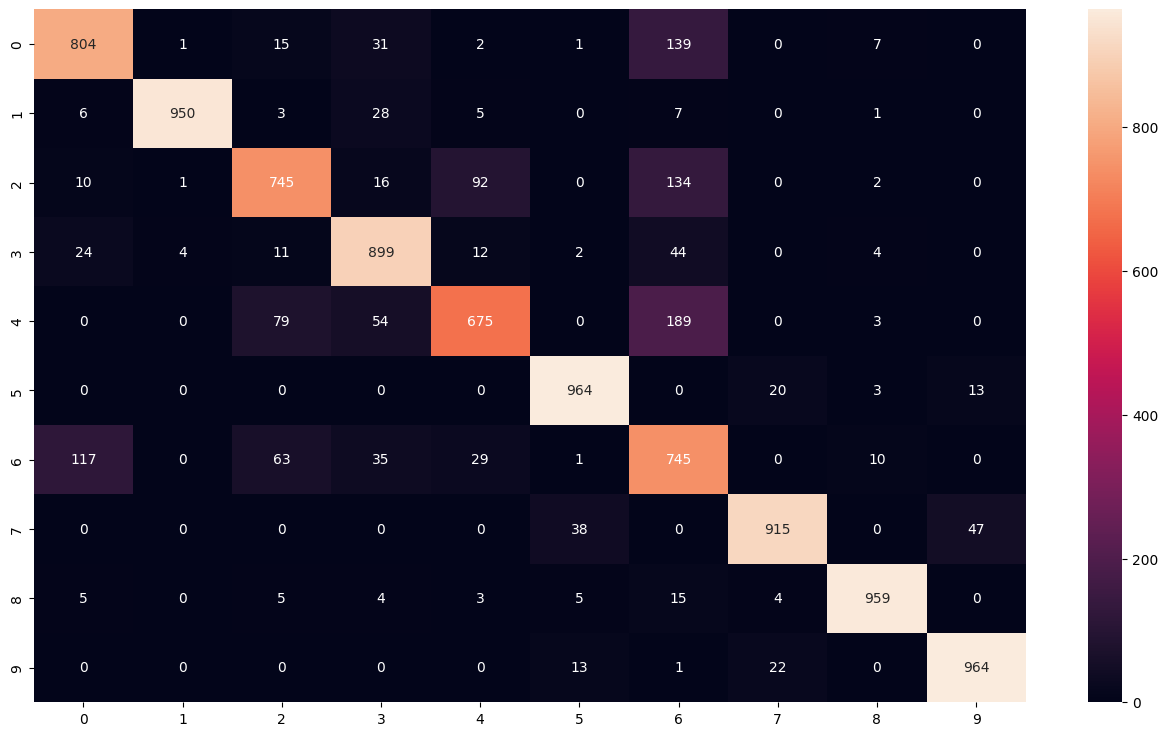

In [26]:
plt.figure(figsize=(16,9))
sns.heatmap(cm, annot=True, fmt = "d")

# Classification Report

In [32]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, [ np.argmax(i) for i in y_pred], target_names = class_labels,

SyntaxError: incomplete input (<ipython-input-32-18138184f988>, line 2)

In [29]:
print(cr)

NameError: name 'cr' is not defined

# Save Model

In [30]:
model.save("MNIST_classifier_nn_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = keras.models.load_model("MNIST_classifier_nn_model.h5")

In [31]:
model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


array([[4.9701828e-07, 2.9725059e-14, 1.0570427e-11, ..., 9.6297432e-03,
        6.1304068e-05, 9.8038870e-01],
       [7.0511719e-06, 2.1441638e-12, 9.9714816e-01, ..., 2.1038347e-20,
        1.9604183e-08, 2.1911998e-20],
       [1.6776439e-04, 9.9982667e-01, 3.6320748e-07, ..., 4.7210014e-12,
        9.2162228e-10, 1.7165057e-12],
       ...,
       [1.9979544e-02, 6.7870015e-10, 2.8809102e-04, ..., 1.7127407e-07,
        9.7855252e-01, 9.3161709e-09],
       [2.7595513e-06, 9.9865550e-01, 2.4194359e-08, ..., 5.6554507e-07,
        3.6014026e-08, 3.7852627e-07],
       [1.1626562e-04, 4.4163464e-09, 9.8594664e-06, ..., 1.3041116e-02,
        2.7103478e-04, 3.1040941e-04]], dtype=float32)